Este exemplo é baseado nos tutoriais disponíveis na página do TensorFlow (https://www.tensorflow.org/get_started/mnist/beginners e https://www.tensorflow.org/get_started/mnist/pros)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import TensorFlow and MNIST
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# carrega os dados do MNIST com os labels no formato "one-hot vector"
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# definimos algumas constantes
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1
IMAGE_SIZE = IMAGE_WIDTH * IMAGE_HEIGHT * IMAGE_CHANNELS

N_CLASSES = 10
MAX_ITERS = 150
BATCH_SIZE = 64

Image shape (784,)
Total of images for training 55000
Total of images for testing 10000


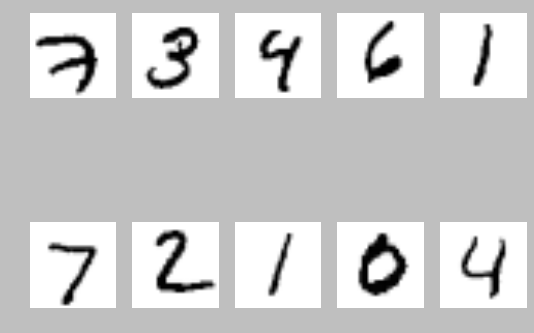

In [5]:
def show_images(train_images, test_images, n_images=5):
    (fig, ax) = plt.subplots(nrows=2, ncols=n_images)
    for i in range(n_images):
        train_image = train_images[i].reshape(
            (IMAGE_HEIGHT, IMAGE_WIDTH))
        ax[0, i].imshow(train_image, cmap='Greys')
        ax[0, i].set_axis_off()
        
        test_image = test_images[i].reshape(
            (IMAGE_HEIGHT, IMAGE_WIDTH))
        ax[1, i].imshow(test_image, cmap='Greys')
        ax[1, i].set_axis_off()

plt.show()

# o formato das imagens já um vetor que representa a matriz 28x28
print('Formato das imagens {}.'.format(mnist.train.images[0].shape))
print('Quantidade de imagens para treino {}.'.format(len(mnist.train.images)))
print('Quantidade de imagens para teste {}.'.format(len(mnist.test.images)))
show_images(mnist.train.images, mnist.test.images)

In [6]:
# definimos uma função simples para avaliar o desempenho da rede
# a cada época ou "n" iterações
def evaluate(model_output, feed_dict={}):
    # número de amostras para avaliar
    n_samples = 500
    
    feed_dict[x] = mnist.test.images[:n_samples]
    feed_dict[y] = mnist.test.labels[:n_samples]
    
    correct_predictions = tf.equal(tf.argmax(model_output, 1), 
                                  tf.argmax(y, 1))
    accuracy_model = tf.reduce_mean(
        tf.cast(correct_predictions, tf.float32))
    accuracy = accuracy_model.eval(feed_dict)
    print('Acurácia do modelo: {}'.format(accuracy)) 

In [7]:
graph = tf.Graph()
with graph.as_default():
    # um placeholder para entradas (imagens) shape=(BATCH_SIZE, n_features)
    x = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE])
    # um placeholder para os labels, shape = (BATCH_SIZE, n_classes)
    y = tf.placeholder(tf.float32, shape=[None, N_CLASSES])
    
    # pesos W
    W = tf.Variable(
        tf.truncated_normal([IMAGE_SIZE, N_CLASSES], stddev = 0.05))
    # viéses b
    b = tf.Variable(tf.zeros([N_CLASSES]))
    
    # modelo linear
    logits = tf.matmul(x, W) + b
    loss = loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
    
    # SGD + momentum para otimização
    learning_rate = 0.01
    momentum = 0.9
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    # minimiza o valor da loss
    optimizer = optimizer.minimize(loss)
    
with tf.Session(graph=graph) as session:
    # inicializa as variáveis globais
    tf.global_variables_initializer().run()
    for iteration in range(MAX_ITERS):
        # obtém o próximo batch de imagens e labels
        (images, labels) = mnist.train.next_batch(BATCH_SIZE)
        # executa uma iteração da otimização
        (_, iter_loss) = session.run([optimizer, loss], 
                              feed_dict={x: images,
                                         y: labels})
    
        # exibe a loss do modelo a cada 10 iterações
        if iteration % 10 == 0:
            print('Iteration {}, loss = {}.'.format(
                iteration, iter_loss))
    
    # avalia o modelo
    model = tf.nn.softmax(logits)
    evaluate(model)

Iteration 0, loss = 2.395573854446411.
Iteration 10, loss = 1.8927152156829834.
Iteration 20, loss = 1.3001104593276978.
Iteration 30, loss = 1.1135289669036865.
Iteration 40, loss = 0.9270250797271729.
Iteration 50, loss = 1.079925775527954.
Iteration 60, loss = 1.1232936382293701.
Iteration 70, loss = 0.6378841400146484.
Iteration 80, loss = 0.4891281723976135.
Iteration 90, loss = 0.5422443151473999.
Iteration 100, loss = 0.43772053718566895.
Iteration 110, loss = 0.5463804006576538.
Iteration 120, loss = 0.517508864402771.
Iteration 130, loss = 0.6060140132904053.
Iteration 140, loss = 0.8609640598297119.
Acurácia do modelo: 0.8640000224113464


In [11]:
graph = tf.Graph()
with graph.as_default():
    # um placeholder para entradas (imagens) shape=(BATCH_SIZE, n_features)
    x = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE])
    x_image = tf.reshape(x, [-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1])
    # um placeholder para os labels, shape = (BATCH_SIZE, n_classes)
    y = tf.placeholder(tf.float32, shape=[None, N_CLASSES])
    
    # pesos W para convolução de tamanho 5x5 com 32 feature maps
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev = 0.05))
    # viéses b
    b_conv1 = tf.Variable(tf.zeros([32]))
    # convolução que não reduz o tamanho da imagem e é aplicada em todos os pixels
    conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')
    conv1 = tf.nn.relu(conv1 + b_conv1)
    
    # max pooling de tamanho 2x2 com stride 2x2
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # pesos W para convolução de tamanho 5x5 com 64 feature maps
    W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev = 0.05))
    # viéses b
    b_conv2 = tf.Variable(tf.zeros([64]))
    # convolução que não reduz o tamanho da imagem e é aplicada em todos os pixels
    conv2 = tf.nn.conv2d(pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(conv2 + b_conv2)
    
    # max pooling de tamanho 2x2 com stride 2x2
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # após este pooling o tamanho da imagem é 7x7x64; são 64 "canais" (feature maps)
    flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    
    # pesos para a camada totalmente conectada
    W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev = 0.05))
    b_fc1 = tf.Variable(tf.zeros([1024]))
    fc1 = tf.nn.relu(tf.matmul(flat, W_fc1) + b_fc1)
    
    # dropout: elimina algumas unidades; veremos no final se der tempo
    keep_prob = tf.placeholder(tf.float32)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev = 0.05))
    b_fc2 = tf.Variable(tf.zeros([10]))
    fc2 = tf.nn.relu(tf.matmul(fc1, W_fc2) + b_fc2)
    
    # modelo linear
    loss = loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=fc2))
    
    # SGD + momentum para otimização
    learning_rate = 0.01
    momentum = 0.9
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    # minimiza o valor da loss
    optimizer = optimizer.minimize(loss)
    
with tf.Session(graph=graph) as session:
    # inicializa as variáveis globais
    tf.global_variables_initializer().run()
    for iteration in range(MAX_ITERS):
        # obtém o próximo batch de imagens e labels
        (images, labels) = mnist.train.next_batch(BATCH_SIZE)
        # executa uma iteração da otimização
        (_, iter_loss) = session.run([optimizer, loss], 
                              feed_dict={x: images,
                                         y: labels,
                                         keep_prob: 0.5})
    
        # exibe a loss do modelo a cada 10 iterações
        if iteration % 10 == 0:
            print('Iteration {}, loss = {}.'.format(
                iteration, iter_loss))
    
    # avalia o modelo
    model = tf.nn.softmax(fc2)
    evaluate(model, {keep_prob: 1.0})

Iteration 0, loss = 2.304069995880127.
Iteration 10, loss = 2.2384514808654785.
Iteration 20, loss = 1.8181251287460327.
Iteration 30, loss = 0.9718219041824341.
Iteration 40, loss = 0.8902308940887451.
Iteration 50, loss = 0.807685911655426.
Iteration 60, loss = 0.38841143250465393.
Iteration 70, loss = 0.4837109446525574.
Iteration 80, loss = 0.4432411789894104.
Iteration 90, loss = 0.18451638519763947.
Iteration 100, loss = 0.3329957127571106.
Iteration 110, loss = 0.1686936914920807.
Iteration 120, loss = 0.19257602095603943.
Iteration 130, loss = 0.3545273542404175.
Iteration 140, loss = 0.254635214805603.
Acurácia do modelo: 0.9419999718666077
